In [1]:
import pandas as pd

# Replace 'your_file.xlsx' with the actual file name
df = pd.read_excel('Match_List_WBBL_with_additional_features.xlsx')

In [2]:
df.head(5)

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,hyperlinks,Match_Details,Team_Batting_First,Team_Batting_Second,Team1_Score,Team2_Score,Result_Details
0,Strikers,Heat,Strikers,3 runs,Adelaide,"Dec 2, 2023",Women's T20,https://www.espncricinfo.com/series/wbbl-2023-...,2023/24,Adelaide Strikers Women,Brisbane Heat Women,125/5,122/8,Strikers won by 3 runs
1,Scorchers,Heat,Heat,67 runs,Perth,"Nov 29, 2023",Women's T20,https://www.espncricinfo.com/series/wbbl-2023-...,2023/24,Brisbane Heat Women,Perth Scorchers Women,197/5,130/8,Heat won by 67 runs
2,Heat,Thunder,Heat,44 runs,Perth,"Nov 28, 2023",Women's T20,https://www.espncricinfo.com/series/wbbl-2023-...,2023/24,Brisbane Heat Women,Sydney Thunder Women,169/8,125/9,Heat won by 44 runs
3,Sixers,Thunder,Sixers,9 wickets,Sydney,"Nov 26, 2023",Women's T20,https://www.espncricinfo.com/series/wbbl-2023-...,2023/24,Sydney Thunder Women,Sydney Sixers Women,123,126/1,Sixers won by 9 wickets (with 15 balls remaining)
4,Strikers,Hurricanes,Strikers,77 runs,Sydney,"Nov 26, 2023",Women's T20,https://www.espncricinfo.com/series/wbbl-2023-...,2023/24,Adelaide Strikers Women,Hobart Hurricanes Women,164/3,87,Strikers won by 77 runs


In [3]:
## Filtering out records where the matches were tied or DLS method was used
condition1 = df['Winner']!='tied'
condition2= ~(df['Result_Details'].str.contains('DLS', case=False, na=False) | df['Result_Details'].str.contains('D/L', case=False, na=False) )

df_subset = df[condition1 & condition2]
len(df_subset)

472

In [4]:
df_subset['Team1_Score']

0      125/5
1      197/5
2      169/8
3        123
4      164/3
       ...  
500    121/5
501    106/9
502    101/9
503    147/4
504    156/7
Name: Team1_Score, Length: 472, dtype: object

In [5]:
# Extracting scores and wickets from the scores
pattern = r'(?P<Score>\d+)(?:/(?P<Wickets>\d+))?'
#
#(?P<Number1>\d+): Captures one or more digits into 'Number1'.
#(?: ... )?: Makes the entire group optional.
#/: Matches a forward slash.
#(?P<Number2>\d+): Captures one or more digits into 'Number2'.

Team1_extracted_numbers = df_subset['Team1_Score'].str.extract(pattern)
# Fill missing values with default values (10 for Number2)
Team1_extracted_numbers['Wickets'] = Team1_extracted_numbers['Wickets'].fillna(10)
# Rename the columns if needed
Team1_extracted_numbers.columns = ['Team1_Score_Number', 'Team1_Wickets']


Team2_extracted_numbers = df_subset['Team2_Score'].str.extract(pattern)
# Fill missing values with default values (10 for Number2)
Team2_extracted_numbers['Wickets'] = Team2_extracted_numbers['Wickets'].fillna(10)
# Rename the columns if needed
Team2_extracted_numbers.columns = ['Team2_Score_Number', 'Team2_Wickets']


In [6]:
Team1_extracted_numbers.head(10)

,Team1_Score_Number,Team1_Wickets
0,125,5
1,197,5
2,169,8
3,123,10
4,164,3
6,104,10
7,160,8
8,212,3
9,157,6
10,176,7


In [7]:
Team2_extracted_numbers.head(10)

,Team2_Score_Number,Team2_Wickets
0,122,8
1,130,8
2,125,9
3,126,1
4,87,10
6,106,5
7,138,9
8,119,10
9,124,9
10,177,4


In [8]:
print(Team1_extracted_numbers.info())
print(Team2_extracted_numbers.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472 entries, 0 to 504
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Team1_Score_Number  472 non-null    object
 1   Team1_Wickets       472 non-null    object
dtypes: object(2)
memory usage: 11.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 472 entries, 0 to 504
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Team2_Score_Number  472 non-null    object
 1   Team2_Wickets       472 non-null    object
dtypes: object(2)
memory usage: 11.1+ KB
None


In [9]:
# Specify the names of the columns you want to extract
columns_to_extract = ['Match_Details', 'Team_Batting_First', 'Team_Batting_Second', 'Result_Details']
# Extract only the specified columns
df_subset_rel_cols = df_subset[columns_to_extract]


In [10]:
df_subset_rel_cols.head(10)

,Match_Details,Team_Batting_First,Team_Batting_Second,Result_Details
0,2023/24,Adelaide Strikers Women,Brisbane Heat Women,Strikers won by 3 runs
1,2023/24,Brisbane Heat Women,Perth Scorchers Women,Heat won by 67 runs
2,2023/24,Brisbane Heat Women,Sydney Thunder Women,Heat won by 44 runs
3,2023/24,Sydney Thunder Women,Sydney Sixers Women,Sixers won by 9 wickets (with 15 balls remaining)
4,2023/24,Adelaide Strikers Women,Hobart Hurricanes Women,Strikers won by 77 runs
6,2023/24,Perth Scorchers Women,Adelaide Strikers Women,Strikers won by 5 wickets (with 31 balls remai...
7,2023/24,Brisbane Heat Women,Sydney Thunder Women,Heat won by 22 runs
8,2023/24,Hobart Hurricanes Women,Melbourne Renegades Women,Hurricanes won by 93 runs
9,2023/24,Melbourne Stars Women,Perth Scorchers Women,Stars won by 33 runs
10,2023/24,Brisbane Heat Women,Sydney Sixers Women,Sixers won by 6 wickets (with 1 ball remaining)


In [11]:
## Combining the two dataframes for further analysis
result_df = pd.concat([df_subset_rel_cols.reset_index(drop=True), Team1_extracted_numbers.reset_index(drop=True),Team2_extracted_numbers.reset_index(drop=True)], axis=1)


In [12]:
result_df.head(10)

,Match_Details,Team_Batting_First,Team_Batting_Second,Result_Details,Team1_Score_Number,Team1_Wickets,Team2_Score_Number,Team2_Wickets
0,2023/24,Adelaide Strikers Women,Brisbane Heat Women,Strikers won by 3 runs,125,5,122,8
1,2023/24,Brisbane Heat Women,Perth Scorchers Women,Heat won by 67 runs,197,5,130,8
2,2023/24,Brisbane Heat Women,Sydney Thunder Women,Heat won by 44 runs,169,8,125,9
3,2023/24,Sydney Thunder Women,Sydney Sixers Women,Sixers won by 9 wickets (with 15 balls remaining),123,10,126,1
4,2023/24,Adelaide Strikers Women,Hobart Hurricanes Women,Strikers won by 77 runs,164,3,87,10
5,2023/24,Perth Scorchers Women,Adelaide Strikers Women,Strikers won by 5 wickets (with 31 balls remai...,104,10,106,5
6,2023/24,Brisbane Heat Women,Sydney Thunder Women,Heat won by 22 runs,160,8,138,9
7,2023/24,Hobart Hurricanes Women,Melbourne Renegades Women,Hurricanes won by 93 runs,212,3,119,10
8,2023/24,Melbourne Stars Women,Perth Scorchers Women,Stars won by 33 runs,157,6,124,9
9,2023/24,Brisbane Heat Women,Sydney Sixers Women,Sixers won by 6 wickets (with 1 ball remaining),176,7,177,4


In [13]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Match_Details        472 non-null    object
 1   Team_Batting_First   472 non-null    object
 2   Team_Batting_Second  472 non-null    object
 3   Result_Details       472 non-null    object
 4   Team1_Score_Number   472 non-null    object
 5   Team1_Wickets        472 non-null    object
 6   Team2_Score_Number   472 non-null    object
 7   Team2_Wickets        472 non-null    object
dtypes: object(8)
memory usage: 29.6+ KB


In [14]:
## Converting the last four columns into numbers
result_df['Team1_Score_Number'] = result_df['Team1_Score_Number'].astype(int)
result_df['Team1_Wickets'] = result_df['Team1_Wickets'].astype(int)
result_df['Team2_Score_Number'] = result_df['Team2_Score_Number'].astype(int)
result_df['Team2_Wickets'] = result_df['Team2_Wickets'].astype(int)

result_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Match_Details        472 non-null    object
 1   Team_Batting_First   472 non-null    object
 2   Team_Batting_Second  472 non-null    object
 3   Result_Details       472 non-null    object
 4   Team1_Score_Number   472 non-null    int32 
 5   Team1_Wickets        472 non-null    int32 
 6   Team2_Score_Number   472 non-null    int32 
 7   Team2_Wickets        472 non-null    int32 
dtypes: int32(4), object(4)
memory usage: 22.2+ KB


In [15]:
result_df['Batting_First_Won'] = result_df.apply(lambda x: 1 if x['Team1_Score_Number'] > x['Team2_Score_Number'] else 0, axis=1)

In [16]:
result_df

,Match_Details,Team_Batting_First,Team_Batting_Second,Result_Details,Team1_Score_Number,Team1_Wickets,Team2_Score_Number,Team2_Wickets,Batting_First_Won
0,2023/24,Adelaide Strikers Women,Brisbane Heat Women,Strikers won by 3 runs,125,5,122,8,1
1,2023/24,Brisbane Heat Women,Perth Scorchers Women,Heat won by 67 runs,197,5,130,8,1
2,2023/24,Brisbane Heat Women,Sydney Thunder Women,Heat won by 44 runs,169,8,125,9,1
3,2023/24,Sydney Thunder Women,Sydney Sixers Women,Sixers won by 9 wickets (with 15 balls remaining),123,10,126,1,0
4,2023/24,Adelaide Strikers Women,Hobart Hurricanes Women,Strikers won by 77 runs,164,3,87,10,1
...,...,...,...,...,...,...,...,...,...
467,2015/16,Hobart Hurricanes Women,Melbourne Renegades Women,Hurricanes won by 35 runs,121,5,86,10,1
468,2015/16,Perth Scorchers Women,Brisbane Heat Women,Scorchers won by 2 runs,106,9,104,10,1
469,2015/16,Sydney Sixers Women,Sydney Thunder Women,Thunder won by 9 wickets (with 40 balls remain...,101,9,103,1,0
470,2015/16,Melbourne Stars Women,Brisbane Heat Women,Stars won by 10 runs,147,4,137,7,1


In [17]:
sum(result_df['Batting_First_Won'])

223

In [74]:
# Calculating the wins secured by batting first team across different seasons
result = result_df.groupby('Match_Details').agg({
    'Result_Details': 'count',
    'Batting_First_Won': 'sum',
    'Team1_Score_Number': 'mean'}).reset_index()

result.columns = ['Season', 'No. of Matches', 'Batting_First_Wins','Average First Innings Score']

In [75]:
result

,Season,No. of Matches,Batting_First_Wins,Average First Innings Score
0,2015/16,55,29,126.145455
1,2016/17,51,20,126.725490
2,2017/18,56,23,131.517857
3,2018/19,53,24,144.264151
4,2019/20,56,23,143.946429
5,2020/21,44,20,133.068182
6,2021/22,51,27,136.764706
7,2022/23,50,25,142.900000
8,2023/24,56,32,153.071429


In [76]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Season                       9 non-null      object 
 1   No. of Matches               9 non-null      int64  
 2   Batting_First_Wins           9 non-null      int64  
 3   Average First Innings Score  9 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 416.0+ bytes


In [77]:
result['Batting_First_Win_Perc']= round((result['Batting_First_Wins']/result['No. of Matches'])*100,1)

In [78]:
result

,Season,No. of Matches,Batting_First_Wins,Average First Innings Score,Batting_First_Win_Perc
0,2015/16,55,29,126.145455,52.7
1,2016/17,51,20,126.725490,39.2
2,2017/18,56,23,131.517857,41.1
3,2018/19,53,24,144.264151,45.3
4,2019/20,56,23,143.946429,41.1
5,2020/21,44,20,133.068182,45.5
6,2021/22,51,27,136.764706,52.9
7,2022/23,50,25,142.900000,50.0
8,2023/24,56,32,153.071429,57.1


In [80]:
# Calculate 'Sum_Winning_Score' after the initial aggregation
result_df.groupby('Match_Details').apply(lambda x: (x['Team1_Score_Number'] * x['Batting_First_Won']).sum()).reset_index(drop=True)/result['Batting_First_Wins']

0    138.827586
1    143.600000
2    153.000000
3    159.333333
4    156.130435
5    145.900000
6    153.037037
7    160.520000
8    170.000000
dtype: float64

In [68]:
### Next Steps

In [ ]:
## 1. Distribution of first innings score
## 2. if required, removal of extremely high scores (or extremely low scores)
## 3. Calculating the average first innings score and average first innings winning score by seasons
## 4. Calculating the percentage of scores that were above the average scores in that particular season 
## 5. Calculating the percentage of matches that were won by teams after scoring above average score
## 6. Repeating the step 4 and 5 with average first innings winning scores 

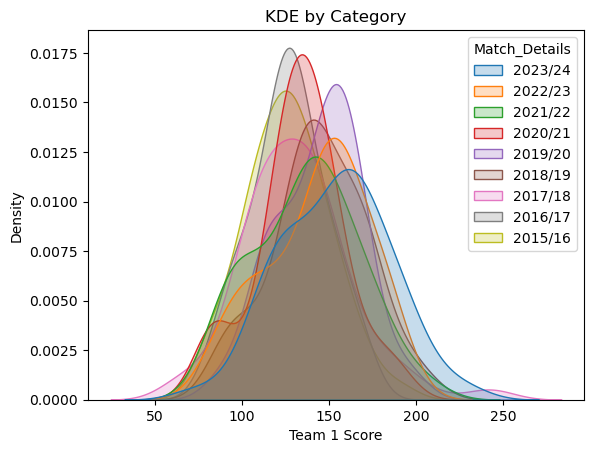

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axis
fig, ax = plt.subplots()

# Use seaborn to create KDE plots by category
sns.kdeplot(data=result_df, x='Team1_Score_Number', hue='Match_Details', fill=True, common_norm=False, ax=ax)

# Set labels and title
ax.set_xlabel('Team 1 Score')
ax.set_ylabel('Density')
ax.set_title('KDE by Category')

# Show the plot
plt.show()


In [ ]:
## In the recent years, the average first innings scores have shifted towards right. 
## Increased first innings scores could be attributed to the 'Power Surges' introduced in WBBL8 | 2022-23

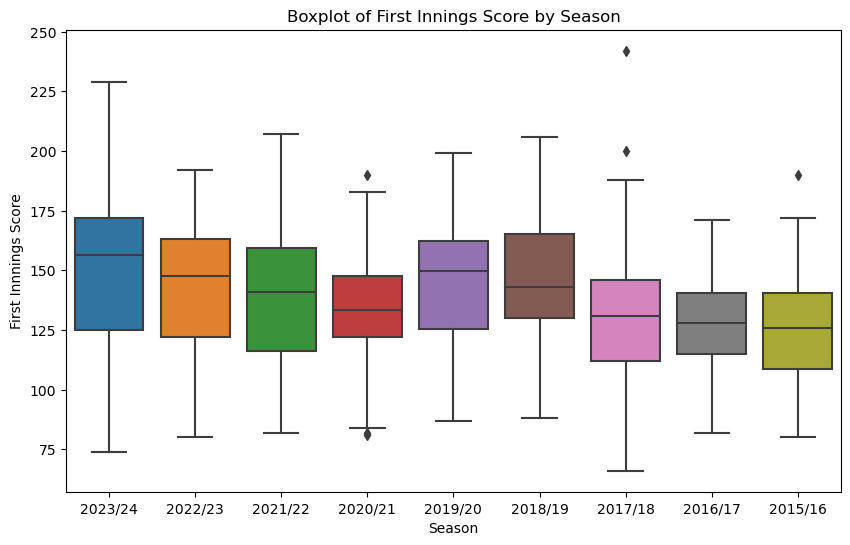

In [85]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Use seaborn to create a boxplot of sales by category
sns.boxplot(x='Match_Details', y='Team1_Score_Number', data=result_df, ax=ax)

# Set labels and title
ax.set_xlabel('Season')
ax.set_ylabel('First Innnings Score')
ax.set_title('Boxplot of First Innings Score by Season')

# Show the plot
plt.show()

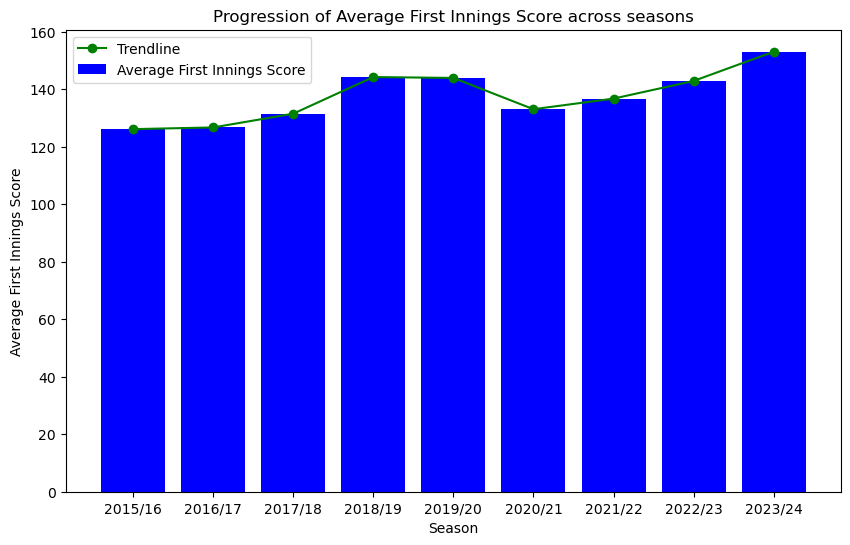

In [87]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart
ax.bar(result['Season'], result['Average First Innings Score'], color='blue', label='Average First Innings Score')

# Connect points with lines
ax.plot(result['Season'], result['Average First Innings Score'], marker='o', linestyle='-', color='green', label='Trendline')

# Set labels and title
ax.set_xlabel('Season')
ax.set_ylabel('Average First Innings Score')
ax.set_title('Progression of Average First Innings Score across seasons')

# Display legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
## It seems that the average first innings scores have risen in the last 3 seasons. 
## We will study the last three seasons and draw inferences regarding the 'Safe Score'

In [157]:
last_3seasons = result_df[result_df['Match_Details'].str.slice(0, 4).astype(int) > 2020]
all_seasons = result_df

In [92]:
last_3seasons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Match_Details        157 non-null    object
 1   Team_Batting_First   157 non-null    object
 2   Team_Batting_Second  157 non-null    object
 3   Result_Details       157 non-null    object
 4   Team1_Score_Number   157 non-null    int32 
 5   Team1_Wickets        157 non-null    int32 
 6   Team2_Score_Number   157 non-null    int32 
 7   Team2_Wickets        157 non-null    int32 
 8   Batting_First_Won    157 non-null    int64 
dtypes: int32(4), int64(1), object(4)
memory usage: 9.8+ KB


In [136]:
# Calculating the wins secured by batting first team across different seasons
Last_3seasons_combined = last_3seasons.agg({
    'Result_Details': 'count',
    'Batting_First_Won': 'sum',
    'Team1_Score_Number': 'mean'})

Last_3seasons_combined =pd.DataFrame(Last_3seasons_combined).T.reset_index(drop=True)

# Display the aggregated DataFrame
print(Last_3seasons_combined)

   Result_Details  Batting_First_Won  Team1_Score_Number
0           157.0               84.0          144.535032


In [137]:
Last_3seasons_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Result_Details      1 non-null      float64
 1   Batting_First_Won   1 non-null      float64
 2   Team1_Score_Number  1 non-null      float64
dtypes: float64(3)
memory usage: 152.0 bytes


In [138]:
Last_3seasons_combined.columns = ['No. of Matches', 'Batting_First_Wins','Average First Innings Score']

In [139]:
Last_3seasons_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   No. of Matches               1 non-null      float64
 1   Batting_First_Wins           1 non-null      float64
 2   Average First Innings Score  1 non-null      float64
dtypes: float64(3)
memory usage: 152.0 bytes


In [158]:
last_3seasons1 = pd.merge(last_3seasons, result[['Season','Average First Innings Score']],left_on='Match_Details', right_on='Season' , how='left')

last_3seasons1 = last_3seasons1.drop(columns=['Season'])
last_3seasons1.tail(10)

all_seasons1 = pd.merge(all_seasons, result[['Season','Average First Innings Score']],left_on='Match_Details', right_on='Season' , how='left')

all_seasons1 = all_seasons1.drop(columns=['Season'])
all_seasons1.tail(10)


,Match_Details,Team_Batting_First,Team_Batting_Second,Result_Details,Team1_Score_Number,Team1_Wickets,Team2_Score_Number,Team2_Wickets,Batting_First_Won,Average First Innings Score
462,2015/16,Adelaide Strikers Women,Hobart Hurricanes Women,Hurricanes won by 9 wickets (with 22 balls rem...,83,10,84,1,0,126.145455
463,2015/16,Hobart Hurricanes Women,Adelaide Strikers Women,Hurricanes won by 2 runs,117,7,115,6,1,126.145455
464,2015/16,Brisbane Heat Women,Sydney Sixers Women,Heat won by 35 runs,190,3,155,7,1,126.145455
465,2015/16,Hobart Hurricanes Women,Melbourne Renegades Women,Hurricanes won by 4 runs,125,7,121,7,1,126.145455
466,2015/16,Sydney Sixers Women,Perth Scorchers Women,Scorchers won by 9 wickets (with 40 balls rema...,81,10,82,1,0,126.145455
467,2015/16,Hobart Hurricanes Women,Melbourne Renegades Women,Hurricanes won by 35 runs,121,5,86,10,1,126.145455
468,2015/16,Perth Scorchers Women,Brisbane Heat Women,Scorchers won by 2 runs,106,9,104,10,1,126.145455
469,2015/16,Sydney Sixers Women,Sydney Thunder Women,Thunder won by 9 wickets (with 40 balls remain...,101,9,103,1,0,126.145455
470,2015/16,Melbourne Stars Women,Brisbane Heat Women,Stars won by 10 runs,147,4,137,7,1,126.145455
471,2015/16,Melbourne Stars Women,Brisbane Heat Women,Stars won by 20 runs,156,7,136,10,1,126.145455


In [148]:
last_3seasons1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 156
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Match_Details                157 non-null    object 
 1   Team_Batting_First           157 non-null    object 
 2   Team_Batting_Second          157 non-null    object 
 3   Result_Details               157 non-null    object 
 4   Team1_Score_Number           157 non-null    int32  
 5   Team1_Wickets                157 non-null    int32  
 6   Team2_Score_Number           157 non-null    int32  
 7   Team2_Wickets                157 non-null    int32  
 8   Batting_First_Won            157 non-null    int64  
 9   Average First Innings Score  157 non-null    float64
dtypes: float64(1), int32(4), int64(1), object(4)
memory usage: 11.0+ KB


In [164]:
all_seasons1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472 entries, 0 to 471
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Match_Details                472 non-null    object 
 1   Team_Batting_First           472 non-null    object 
 2   Team_Batting_Second          472 non-null    object 
 3   Result_Details               472 non-null    object 
 4   Team1_Score_Number           472 non-null    int32  
 5   Team1_Wickets                472 non-null    int32  
 6   Team2_Score_Number           472 non-null    int32  
 7   Team2_Wickets                472 non-null    int32  
 8   Batting_First_Won            472 non-null    int64  
 9   Average First Innings Score  472 non-null    float64
 10  Flag_Above_Season_Average    472 non-null    int64  
dtypes: float64(1), int32(4), int64(2), object(4)
memory usage: 36.9+ KB


In [167]:
last_3seasons1['Flag_Above_Season_Average'] = last_3seasons1.apply(lambda x: 1 if x['Team1_Score_Number'] > x['Average First Innings Score'] else 0, axis=1)

In [151]:
last_3seasons1

,Match_Details,Team_Batting_First,Team_Batting_Second,Result_Details,Team1_Score_Number,Team1_Wickets,Team2_Score_Number,Team2_Wickets,Batting_First_Won,Average First Innings Score,Flag_Above_Season_Average
0,2023/24,Adelaide Strikers Women,Brisbane Heat Women,Strikers won by 3 runs,125,5,122,8,1,153.071429,0
1,2023/24,Brisbane Heat Women,Perth Scorchers Women,Heat won by 67 runs,197,5,130,8,1,153.071429,1
2,2023/24,Brisbane Heat Women,Sydney Thunder Women,Heat won by 44 runs,169,8,125,9,1,153.071429,1
3,2023/24,Sydney Thunder Women,Sydney Sixers Women,Sixers won by 9 wickets (with 15 balls remaining),123,10,126,1,0,153.071429,0
4,2023/24,Adelaide Strikers Women,Hobart Hurricanes Women,Strikers won by 77 runs,164,3,87,10,1,153.071429,1
...,...,...,...,...,...,...,...,...,...,...,...
152,2021/22,Hobart Hurricanes Women,Melbourne Stars Women,Hurricanes won by 63 runs,152,4,89,10,1,136.764706,1
153,2021/22,Hobart Hurricanes Women,Sydney Sixers Women,Sixers won by 5 wickets (with 3 balls remaining),125,9,129,5,0,136.764706,0
154,2021/22,Adelaide Strikers Women,Sydney Thunder Women,Strikers won by 30 runs,140,7,110,10,1,136.764706,1
155,2021/22,Hobart Hurricanes Women,Melbourne Renegades Women,Renegades won by 6 wickets (with 4 balls remai...,121,10,125,4,0,136.764706,0


In [168]:
all_seasons1['Flag_Above_Season_Average'] = all_seasons1.apply(lambda x: 1 if x['Team1_Score_Number'] > x['Average First Innings Score'] else 0, axis=1)

In [169]:
# Calculating the wins secured by batting first team across different seasons
result_3seasons = last_3seasons1.groupby('Match_Details').agg({
    'Result_Details': 'count',
    'Batting_First_Won': 'sum',
    'Team1_Score_Number': 'mean',
    'Flag_Above_Season_Average': 'sum',}).reset_index()

result_3seasons.columns = ['Season', 'No. of Matches', 'Batting_First_Wins','Average First Innings Score','Scores above season average']

# Calculating the wins secured by batting first team across different seasons
all_seasons = all_seasons1.groupby('Match_Details').agg({
    'Result_Details': 'count',
    'Batting_First_Won': 'sum',
    'Team1_Score_Number': 'mean',
    'Flag_Above_Season_Average': 'sum',}).reset_index()

all_seasons.columns = ['Season', 'No. of Matches', 'Batting_First_Wins','Average First Innings Score','Scores above season average']


In [170]:
result_3seasons

,Season,No. of Matches,Batting_First_Wins,Average First Innings Score,Scores above season average
0,2021/22,51,27,136.764706,29
1,2022/23,50,25,142.900000,29
2,2023/24,56,32,153.071429,30


In [171]:
# Calculate 'Sum_Winning_Score' after the initial aggregation
result_3seasons['Matches Won by Team above average']= last_3seasons1.groupby('Match_Details').apply(lambda x: (x['Flag_Above_Season_Average'] * x['Batting_First_Won']).sum()).reset_index(drop=True)

In [172]:
result_3seasons

,Season,No. of Matches,Batting_First_Wins,Average First Innings Score,Scores above season average,Matches Won by Team above average
0,2021/22,51,27,136.764706,29,23
1,2022/23,50,25,142.900000,29,21
2,2023/24,56,32,153.071429,30,26


In [173]:
# Calculate 'Sum_Winning_Score' after the initial aggregation
all_seasons['Matches Won by Team above average']= all_seasons1.groupby('Match_Details').apply(lambda x: (x['Flag_Above_Season_Average'] * x['Batting_First_Won']).sum()).reset_index(drop=True)

In [174]:
all_seasons

,Season,No. of Matches,Batting_First_Wins,Average First Innings Score,Scores above season average,Matches Won by Team above average
0,2015/16,55,29,126.145455,27,20
1,2016/17,51,20,126.725490,27,17
2,2017/18,56,23,131.517857,28,18
3,2018/19,53,24,144.264151,25,17
4,2019/20,56,23,143.946429,31,18
5,2020/21,44,20,133.068182,22,14
6,2021/22,51,27,136.764706,29,23
7,2022/23,50,25,142.900000,29,21
8,2023/24,56,32,153.071429,30,26


In [210]:
# Overall_Analysis
score_distribution = []

# Loop over scores from 100 to 200 with increments of 2
for index_score in range(80, 201, 2):
    # Calculate statistics for each score
    matches_above_score = all_seasons1[all_seasons1['Team1_Score_Number'] >= index_score].shape[0]
    matches_won_above_score = all_seasons1[(all_seasons1['Team1_Score_Number'] >= index_score) & all_seasons1['Batting_First_Won']].shape[0]

    # Append results to the list
    score_distribution.append({
        'Score': index_score,
        'No. of Matches (Above Score)': matches_above_score,
        'No. of Matches (Won, Above Score)': matches_won_above_score
    })

# Create a new DataFrame from the list of results
score_distribution = pd.DataFrame(score_distribution)

# Display the result
print(score_distribution)

    Score  No. of Matches (Above Score)  No. of Matches (Won, Above Score)
0      80                           469                                223
1      82                           465                                223
2      84                           459                                223
3      86                           457                                223
4      88                           454                                223
..    ...                           ...                                ...
56    192                            15                                 15
57    194                            11                                 11
58    196                            10                                 10
59    198                             8                                  8
60    200                             7                                  7

[61 rows x 3 columns]


In [211]:
score_distribution['perc_winning']= round((score_distribution['No. of Matches (Won, Above Score)']/score_distribution['No. of Matches (Above Score)'])*100,2)

In [212]:
score_distribution

,Score,No. of Matches (Above Score),"No. of Matches (Won, Above Score)",perc_winning
0,80,469,223,47.55
1,82,465,223,47.96
2,84,459,223,48.58
3,86,457,223,48.80
4,88,454,223,49.12
...,...,...,...,...
56,192,15,15,100.00
57,194,11,11,100.00
58,196,10,10,100.00
59,198,8,8,100.00


In [221]:
# Overall_Analysis
score_distribution1 = []

# Loop over scores from 100 to 200 with increments of 2
for index_score in range(80, 201, 2):
    # Calculate statistics for each score
    matches_above_score = last_3seasons1[last_3seasons1['Team1_Score_Number'] >= index_score].shape[0]
    matches_won_above_score = last_3seasons1[(last_3seasons1['Team1_Score_Number'] >= index_score) & last_3seasons1['Batting_First_Won']].shape[0]

    # Append results to the list
    score_distribution1.append({
        'Score': index_score,
        'No. of Matches (Above Score, last3 seasons)': matches_above_score,
        'No. of Matches (Won, Above Score, last 3 seasons)': matches_won_above_score
    })

# Create a new DataFrame from the list of results
score_distribution1 = pd.DataFrame(score_distribution1)

# Display the result
print(score_distribution1)

    Score  No. of Matches (Above Score, last3 seasons)  \
0      80                                          156   
1      82                                          155   
2      84                                          153   
3      86                                          153   
4      88                                          153   
..    ...                                          ...   
56    192                                            8   
57    194                                            6   
58    196                                            5   
59    198                                            4   
60    200                                            4   

    No. of Matches (Won, Above Score, last 3 seasons)  
0                                                  84  
1                                                  84  
2                                                  84  
3                                                  84  
4                      

In [222]:
score_distribution1['perc_winning last 3 seasons']= round((score_distribution1['No. of Matches (Won, Above Score, last 3 seasons)']/score_distribution1['No. of Matches (Above Score, last3 seasons)'])*100,2)

In [223]:
score_distribution1

,Score,"No. of Matches (Above Score, last3 seasons)","No. of Matches (Won, Above Score, last 3 seasons)",perc_winning last 3 seasons
0,80,156,84,53.85
1,82,155,84,54.19
2,84,153,84,54.90
3,86,153,84,54.90
4,88,153,84,54.90
...,...,...,...,...
56,192,8,8,100.00
57,194,6,6,100.00
58,196,5,5,100.00
59,198,4,4,100.00


In [224]:
score_distribution_new=  pd.merge(score_distribution, score_distribution1,on='Score', how='left')
score_distribution_new

,Score,No. of Matches (Above Score),"No. of Matches (Won, Above Score)",perc_winning,"No. of Matches (Above Score, last3 seasons)","No. of Matches (Won, Above Score, last 3 seasons)",perc_winning last 3 seasons
0,80,469,223,47.55,156,84,53.85
1,82,465,223,47.96,155,84,54.19
2,84,459,223,48.58,153,84,54.90
3,86,457,223,48.80,153,84,54.90
4,88,454,223,49.12,153,84,54.90
...,...,...,...,...,...,...,...
56,192,15,15,100.00,8,8,100.00
57,194,11,11,100.00,6,6,100.00
58,196,10,10,100.00,5,5,100.00
59,198,8,8,100.00,4,4,100.00


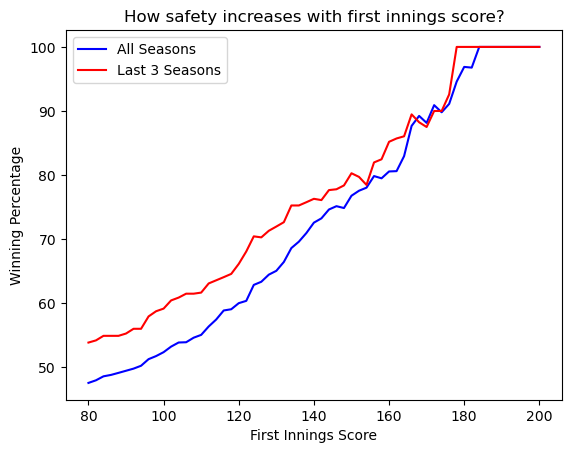

In [228]:
plt.plot(score_distribution_new['Score'], score_distribution_new['perc_winning'], label= 'All Seasons' ,color='blue')
plt.plot(score_distribution_new['Score'], score_distribution_new['perc_winning last 3 seasons'], label='Last 3 Seasons', color='red')

# Set labels and title
plt.xlabel('First Innings Score')
plt.ylabel('Winning Percentage')
plt.title('How safety increases with first innings score?')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [230]:
# Plotting
#fig, ax1 = plt.subplots()

# Plot perc_winning on the left y-axis (ax1)
#color = 'tab:blue'
#ax1.set_xlabel('First Innings Score')
#ax1.set_ylabel('Winning Percentage (All Seasons)', color=color)
#ax1.plot(score_distribution_new['Score'], score_distribution_new['perc_winning'], color=color)
#ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for perc_winning last 3 seasons
#ax2 = ax1.twinx()
#color = 'tab:red'
#ax2.set_ylabel('Winning Percentage (Last 3 Seasons)', color=color)
#ax2.plot(score_distribution_new['Score'], score_distribution_new['perc_winning last 3 seasons'], color=color)
#ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
#plt.title('How safety increases with first innings score?')
#plt.show()

In [232]:
last_season = result_df[result_df['Match_Details'].str.slice(0, 4).astype(int) > 2022]

In [233]:
last_season.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Match_Details        56 non-null     object
 1   Team_Batting_First   56 non-null     object
 2   Team_Batting_Second  56 non-null     object
 3   Result_Details       56 non-null     object
 4   Team1_Score_Number   56 non-null     int32 
 5   Team1_Wickets        56 non-null     int32 
 6   Team2_Score_Number   56 non-null     int32 
 7   Team2_Wickets        56 non-null     int32 
 8   Batting_First_Won    56 non-null     int64 
dtypes: int32(4), int64(1), object(4)
memory usage: 3.5+ KB


In [234]:
# Overall_Analysis
score_distribution2 = []

# Loop over scores from 100 to 200 with increments of 2
for index_score in range(80, 201, 2):
    # Calculate statistics for each score
    matches_above_score = last_season[last_season['Team1_Score_Number'] >= index_score].shape[0]
    matches_won_above_score = last_season[(last_season['Team1_Score_Number'] >= index_score) & last_season['Batting_First_Won']].shape[0]

    # Append results to the list
    score_distribution2.append({
        'Score': index_score,
        'No. of Matches (Above Score, last season)': matches_above_score,
        'No. of Matches (Won, Above Score, last season)': matches_won_above_score
    })

# Create a new DataFrame from the list of results
score_distribution2 = pd.DataFrame(score_distribution2)

# Display the result
print(score_distribution2)

    Score  No. of Matches (Above Score, last season)  \
0      80                                         55   
1      82                                         55   
2      84                                         55   
3      86                                         55   
4      88                                         55   
..    ...                                        ...   
56    192                                          5   
57    194                                          4   
58    196                                          4   
59    198                                          3   
60    200                                          3   

    No. of Matches (Won, Above Score, last season)  
0                                               32  
1                                               32  
2                                               32  
3                                               32  
4                                               32  
..       

In [235]:
score_distribution2['perc_winning last season']= round((score_distribution2['No. of Matches (Won, Above Score, last season)']/score_distribution2['No. of Matches (Above Score, last season)'])*100,2)

In [236]:
score_distribution_new=  pd.merge(score_distribution_new, score_distribution2,on='Score', how='left')
score_distribution_new

,Score,No. of Matches (Above Score),"No. of Matches (Won, Above Score)",perc_winning,"No. of Matches (Above Score, last3 seasons)","No. of Matches (Won, Above Score, last 3 seasons)",perc_winning last 3 seasons,"No. of Matches (Above Score, last season)","No. of Matches (Won, Above Score, last season)",perc_winning last season
0,80,469,223,47.55,156,84,53.85,55,32,58.18
1,82,465,223,47.96,155,84,54.19,55,32,58.18
2,84,459,223,48.58,153,84,54.90,55,32,58.18
3,86,457,223,48.80,153,84,54.90,55,32,58.18
4,88,454,223,49.12,153,84,54.90,55,32,58.18
...,...,...,...,...,...,...,...,...,...,...
56,192,15,15,100.00,8,8,100.00,5,5,100.00
57,194,11,11,100.00,6,6,100.00,4,4,100.00
58,196,10,10,100.00,5,5,100.00,4,4,100.00
59,198,8,8,100.00,4,4,100.00,3,3,100.00


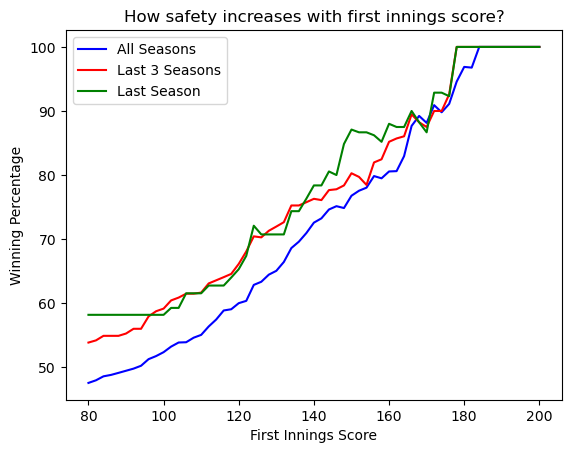

In [237]:
plt.plot(score_distribution_new['Score'], score_distribution_new['perc_winning'], label= 'All Seasons' ,color='blue')
plt.plot(score_distribution_new['Score'], score_distribution_new['perc_winning last 3 seasons'], label='Last 3 Seasons', color='red')
plt.plot(score_distribution_new['Score'], score_distribution_new['perc_winning last season'], label='Last Season', color='green')

# Set labels and title
plt.xlabel('First Innings Score')
plt.ylabel('Winning Percentage')
plt.title('How safety increases with first innings score?')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [238]:
score_distribution_new.to_excel('Safe_Score_Analysis.xlsx', index=False)
